<a href="https://colab.research.google.com/github/Psyclophe/Power-PDF/blob/master/2_PCA_Aprendizaje_no_supervisadoII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje no supervisado

# PCA - Reducción de Dimensionalidad
### `Skillsforindustry.org`


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#cargamos los datos de entrada
dataframe = pd.read_csv("https://raw.githubusercontent.com/arturoTellez/S4I_DS_G2/main/M%C3%B3dulo%202_%20Machine%20Learning/DS%20-M%C3%B3dulo%202-%20Sesi%C3%B3n%206/comprar_alquilar.csv")
dataframe.tail(10)
 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [ ]:
#fit (obtiene la media y la desviación)
mean = dataframe.mean(axis = 0)["ingresos"]
std = dataframe.std(axis = 0)["ingresos"]


In [ ]:
#fit_transform (obtiene la media y la desviación, y se lo aplica  a los datos)
mean = dataframe.mean(axis = 0)["ingresos"]
std = dataframe.std(axis = 0)["ingresos"]
(dataframe["ingresos"] - mean) / std

0      0.618592
1      1.061290
2      0.888964
3      1.271051
4      0.717827
         ...   
197   -0.670284
198   -0.593034
199   -1.054747
200   -0.965614
201   -0.576990
Name: ingresos, Length: 202, dtype: float64

In [ ]:
#.transform (Aplica la formula)
(10 - mean) / std

-2.94081951688325

In [ ]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
X_scaled=scaler.fit_transform(df)

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
pca.get_covariance()

array([[ 1.00497512,  0.5629981 , -0.11032655, -0.12472213,  0.71643609,
         0.61777897, -0.04276731, -0.02460492, -0.03904572],
       [ 0.5629981 ,  1.00497512, -0.05467034, -0.10037758,  0.21045568,
         0.20579933, -0.05743681, -0.07268108, -0.07948892],
       [-0.11032655, -0.05467034,  1.00497512,  0.01065519, -0.19426111,
        -0.09510155,  0.0524989 , -0.04508134,  0.01903984],
       [-0.12472213, -0.10037758,  0.01065519,  1.00497512, -0.06470463,
        -0.05484819, -0.02032621,  0.12546587,  0.04754858],
       [ 0.71643609,  0.21045568, -0.19426111, -0.06470463,  1.00497512,
         0.60884971, -0.06335265,  0.00145255, -0.02394761],
       [ 0.61777897,  0.20579933, -0.09510155, -0.05484819,  0.60884971,
         1.00497512, -0.11398447, -0.14263039, -0.21284321],
       [-0.04276731, -0.05743681,  0.0524989 , -0.02032621, -0.06335265,
        -0.11398447,  1.00497512,  0.51013414,  0.59244489],
       [-0.02460492, -0.07268108, -0.04508134,  0.12546587,  0

In [ ]:
pca.explained_variance_

array([2.70561424, 2.10697364, 1.05925553, 0.96649057, 0.87148938,
       0.50920879, 0.37495835, 0.27295496, 0.17783067])

In [ ]:
pca.explained_variance_.sum()

9.044776119402977

In [ ]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [ ]:
pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [ ]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


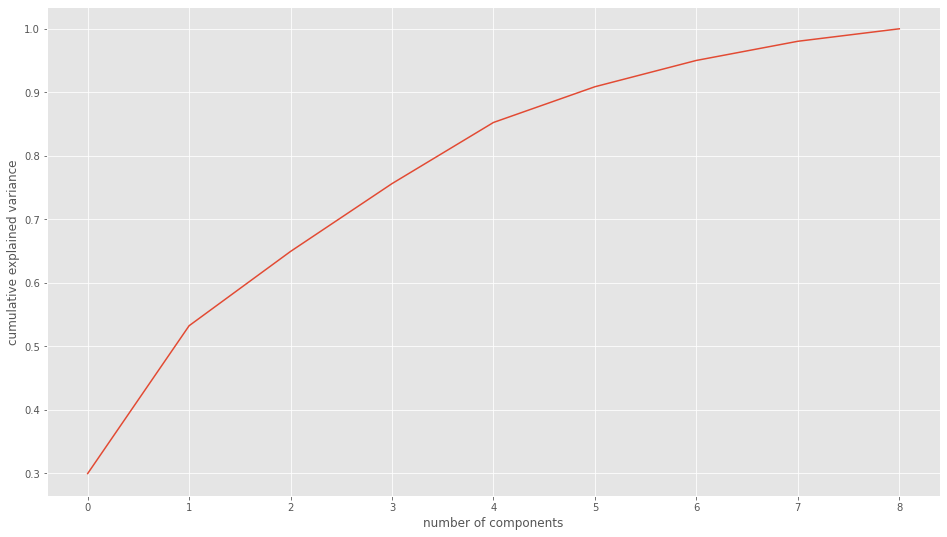

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

En esta gráfica de variabilidad explicada acumulada, vemos que tomando los primeros 5 componentes llegamos al 85%

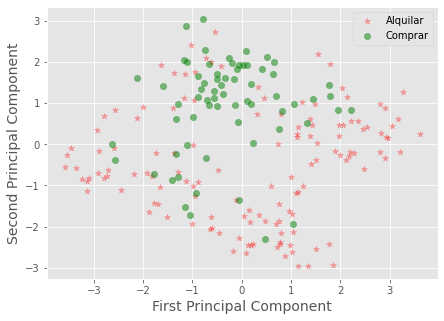

In [ ]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
    
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Aquí vemos que al reducir las 9 dimensiones iniciales a tan sólo 2 logramos darnos una idea de dónde visualizar nuestras predicciones para comprar o alquilar casa.

## Conclusiones Finales

Con PCA obtenemos:

* una medida de como cada variable se asocia con las otras (matriz de covarianza)
* La dirección en las que nuestros datos están dispersos (autovectores)
* La relativa importancia de esas distintas direcciones (autovalores)

PCA combina nuestros predictores y nos permite deshacernos de los autovectores de menor importancia relativa.